<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris_data = load_iris()
df = pd.DataFrame(iris_data["data"],columns=iris_data["feature_names"])
iris_np = np.array(df)
df["target"] = iris_data["target"]
iris_target_np = np.array(df["target"])


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_np, iris_target_np, test_size=0.1)

In [20]:
# 已知clusters k就直接選
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3, n_init=10)
clu.fit(x_train)

KMeans(n_clusters=3, n_init=10)

In [21]:
clu.labels_  # 分群的標籤

array([1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0,
       1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2,
       0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1,
       2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1,
       2, 0, 1], dtype=int32)

In [22]:
 # 驗證 # 只是因為他只是分成三類0~2 但是並一定是標籤的0~2
print("預測結果:", list(clu.predict(x_test)))
print("實際結果:", list(y_test))
from sklearn.metrics import accuracy_score
score = accuracy_score(clu.predict(x_test), y_test)
print("正確率:", score)


預測結果: [0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 0]
實際結果: [0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 0]
正確率: 1.0


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
x = df.drop(["target"], axis=1)
plotx = []
ploty = []
for k in range(2, 6):
    
    clu = KMeans(n_clusters=k, n_init=5)  # n_init: times run with different centroid
    clu.fit(x)
    plotx.append(k)
    ploty.append(silhouette_score(x, clu.labels_))
print("k值:", plotx)
print("silhouette_score:", ploty)
    

k值: [2, 3, 4, 5]
silhouette_score: [0.6810461692117462, 0.5528190123564095, 0.49805050499728737, 0.48997211669094703]


In [24]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0, 0.5, 'Sihouette Score')

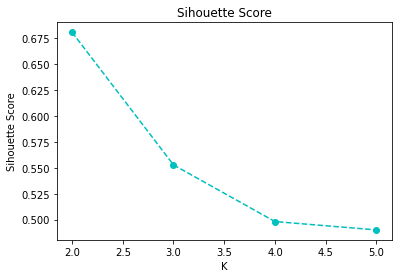

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline  
# % for notebook 指令 matplotlib inline 自動show plot
plt.plot(plotx, ploty, "co--") # fmt = "c" + "o" + "__"
plt.title("Sihouette Score")
plt.xlabel("K")
plt.ylabel("Sihouette Score")

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

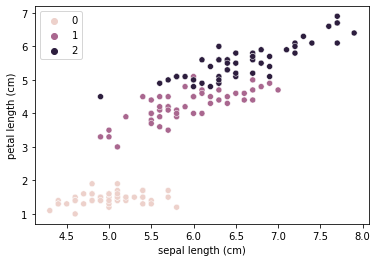

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

xaxis = df["sepal length (cm)"]
yaxis = df["petal length (cm)"]
# data數量要相同才能hue
sns.scatterplot(x=xaxis ,y=yaxis, hue=iris_target_np)